In [18]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py

import sys
sys.path.append('../py_files/')
#import weights
import control_sample as control
import arepo_package as arepo

In [19]:
from tqdm import tqdm
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

import scienceplots
plt.style.use('science')

## Comparing the stellar mass vs SFR for TNG and BRAHMA

In [20]:
basePath = "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3"
import illustris_python as il
h = il.groupcat.loadHeader(basePath,0)['HubbleParam']

In [30]:
il.groupcat.loadHeader(basePath,0)['BoxSize']/h

18461.084034854524

In [4]:
fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR','SubhaloGasMetallicity','SubhaloStarMetallicity','SubhaloPos','SubhaloHalfmassRadType','SubhaloMassInHalfRadType']

In [5]:
subhalos, o_redshift = arepo.get_subhalo_property(basePath, fields,0, postprocessed=1) 

In [6]:
Brahma_SFR = subhalos['SubhaloSFR']
Brahma_Mstar = subhalos['SubhaloMassType'][:,4] * 1e10/h

In [24]:
ill_base_path = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'

In [25]:
subhalos = il.groupcat.loadSubhalos(
                ill_base_path,99, 
                fields,
            )

In [9]:
TNG_50_SFR = subhalos['SubhaloSFR']
TNG_50_Mstar = subhalos['SubhaloMassType'][:,4] * 1e10/h

### Galaxy stellar mass function

In [80]:
TNG_50_volume = (il.groupcat.loadHeader(ill_base_path,0)['BoxSize']/h/1000)**3 #Mpc

In [110]:
Brahma_volume = (il.groupcat.loadHeader(basePath,0)['BoxSize']/h/1000)**3 #Mpc

In [161]:
Mstar_log_min =5
Mstar_log_max =13
Mstar_log_binsize = 0.5
Mstar_log_bins = np.arange(Mstar_log_min,Mstar_log_max,Mstar_log_binsize)

In [162]:
N_Mstar_TNG_50 = np.histogram(np.log10(TNG_50_Mstar[TNG_50_Mstar>0]), bins=Mstar_log_bins)[0]
dN_by_dlog_Mstar_TNG_50 =  (N_Mstar_TNG_50/Mstar_log_binsize)/TNG_50_volume #(cMpc)^-3

In [153]:
Mstar_log_min =5
Mstar_log_max =13
Mstar_log_binsize = 0.5
Mstar_log_bins_brahma = np.arange(Mstar_log_min,Mstar_log_max,Mstar_log_binsize)

In [154]:
N_Mstar_Brahma = np.histogram(np.log10(Brahma_Mstar[Brahma_Mstar>0]), bins=Mstar_log_bins_brahma)[0]
dN_by_dlog_Mstar_Brahma =  (N_Mstar_Brahma/Mstar_log_binsize)/Brahma_volume #(cMpc)^-3

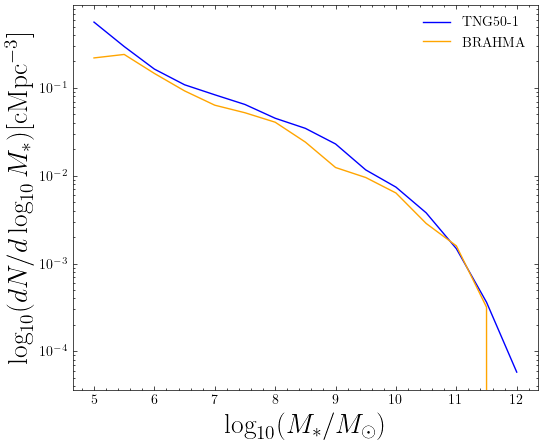

In [160]:
plt.figure(figsize=(6,5))
plt.plot(Mstar_log_bins[:-1],dN_by_dlog_Mstar_TNG_50, label='TNG50-1', color='blue')
plt.plot(Mstar_log_bins_brahma[:-1],dN_by_dlog_Mstar_Brahma, label='BRAHMA', color='orange')
plt.yscale('log',base=10)
plt.ylabel(r"$\log_{10} (dN/d\log_{10}M_*) \rm [c Mpc^{-3} ]$",fontsize=20)
plt.xlabel(r"$\log_{10} (M_*/M_\odot)$",fontsize=20)
plt.legend()

Text(0.5, 1.0, 'z=0')

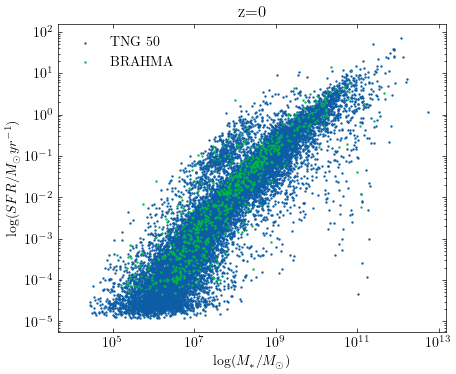

In [10]:
plt.figure(figsize=[5,4])
plt.scatter(TNG_50_Mstar[TNG_50_Mstar>0],TNG_50_SFR[TNG_50_Mstar>0],s=0.5,label="TNG 50")
plt.scatter(Brahma_Mstar[Brahma_Mstar>0],Brahma_SFR[Brahma_Mstar>0],s=0.5,label="BRAHMA")
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.xlabel("$\log(M_{*}/M_{\odot})$")
plt.ylabel("$\log(SFR/M_{\odot} yr^{-1})$")
plt.legend()
plt.title("z=0")

In [11]:
brahma_z = 5
subhalos, o_redshift = arepo.get_subhalo_property(basePath, fields,brahma_z, postprocessed=1) 

Brahma_SFR = subhalos['SubhaloSFR']
Brahma_Mstar = subhalos['SubhaloMassType'][:,4] * 1e10/h

TNG_snap = 17
subhalos = il.groupcat.loadSubhalos(
                ill_base_path,17, 
                fields,
            )

TNG_50_SFR = subhalos['SubhaloSFR']
TNG_50_Mstar = subhalos['SubhaloMassType'][:,4] * 1e10/h

Text(0.5, 1.0, 'z=5')

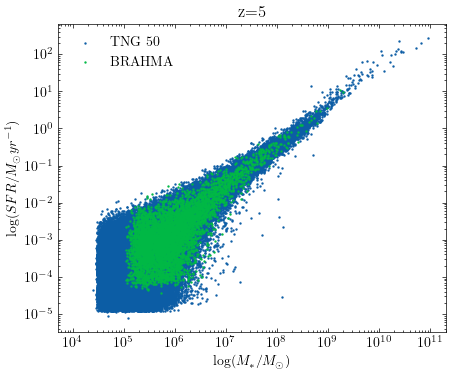

In [12]:
plt.figure(figsize=[5,4])
plt.scatter(TNG_50_Mstar[TNG_50_Mstar>0],TNG_50_SFR[TNG_50_Mstar>0],s=0.5,label="TNG 50")
plt.scatter(Brahma_Mstar[Brahma_Mstar>0],Brahma_SFR[Brahma_Mstar>0],s=0.5,label="BRAHMA")
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.xlabel("$\log(M_{*}/M_{\odot})$")
plt.ylabel("$\log(SFR/M_{\odot} yr^{-1})$")
plt.legend()
plt.title("z=5")

## SFR vs stellar masss for mergers vs non-mergers in TNG and BRAHMA

In [13]:
brahma_run_name = "output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3"
merger_file_path = '/home/pranavsatheesh/host_galaxies/data/merger_files/'
merger_file = merger_file_path + 'brahma_merger_file_'+brahma_run_name+'.npy'
bh_merger_properties = np.load(merger_file,allow_pickle=True).item()

In [14]:
basePath = "/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3"
h = il.groupcat.loadHeader(basePath,0)['HubbleParam']
true_merger_flag =  np.logical_and(np.array(bh_merger_properties['merger_type']) == 1,
                                           np.array(bh_merger_properties['remnant_SubhaloStellarMass']) > 0
)
print("The number of BH mergers in this run is %d"%(np.sum(true_merger_flag)))
N_mergers = np.sum(true_merger_flag)

brahma_merger_data = {}

for key in bh_merger_properties.keys():
    brahma_merger_data[key] = np.array(bh_merger_properties[key])[true_merger_flag]

brahma_merger_data = brahma_merger_data
z_bh_mergers = brahma_merger_data['remnant_redshift']

snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)
snap_list = snap_list
z_list = z_list

#find unique redshifts
unique_merger_z = np.unique(brahma_merger_data['remnant_redshift'])
unique_merger_snap = []

for z_i in unique_merger_z:
    idx = np.where(z_list == z_i)[0]
    unique_merger_snap.append(snap_list[idx[0]])

The number of BH mergers in this run is 2353


In [15]:
def initialize_population_dict(key="M"):

        if(key=="M"): #for merging population
            return {
                "snap": np.array([], dtype=int),
                "z": np.array([], dtype=float),
                "subhalo_ids": np.array([], dtype=int),
                "Mstar": np.array([], dtype=float),
                "Mgas": np.array([], dtype=float),
                "MBH": np.array([], dtype=float),
                "Mdot": np.array([], dtype=float),
                "SFR": np.array([], dtype=float),
                "MBH1": np.array([], dtype=float),
                "MBH2": np.array([], dtype=float),
                "Mstar-half": np.array([], dtype=float),
                "Mgas-half": np.array([], dtype=float)

            }
        else:
            return {
                "snap": [],
                "z": [],
                "subhalo_ids": [],
                "Mstar": [],
                "Mgas": [],
                "MBH": [],
                "Mdot": [],
                "SFR": [],
                "Mstar-half": np.array([], dtype=float),
                "Mgas-half": np.array([], dtype=float)
            }
        

In [16]:
merging_pop = initialize_population_dict(key='M')
non_merging_pop = initialize_population_dict(key='N')

In [17]:
def update_merger_details(merging_pop,subhalos,subhalo_ids_merging,redshift,snapnum,brahma_merger_data_idx):

        merging_pop["subhalo_ids"] = np.concatenate((merging_pop["subhalo_ids"], subhalo_ids_merging))
        merging_pop["snap"] = np.append(merging_pop["snap"], snapnum*np.ones(len(subhalo_ids_merging)))
        merging_pop["z"] = np.append(merging_pop["z"], redshift*np.ones(len(subhalo_ids_merging)))
        merging_pop["Mstar"] = np.concatenate((merging_pop["Mstar"], subhalos['SubhaloMassType'][:,4][subhalo_ids_merging]))
        merging_pop["Mgas"] = np.concatenate((merging_pop["Mgas"], subhalos['SubhaloMassType'][:,0][subhalo_ids_merging]))
        merging_pop["MBH"] = np.concatenate((merging_pop["MBH"], subhalos['SubhaloBHMass'][subhalo_ids_merging]))
        merging_pop["Mdot"] = np.concatenate((merging_pop["Mdot"], subhalos['SubhaloBHMdot'][subhalo_ids_merging]))
        merging_pop["SFR"] = np.concatenate((merging_pop["SFR"], subhalos['SubhaloSFR'][subhalo_ids_merging]))
        merging_pop["MBH1"] = np.concatenate((merging_pop["MBH1"], brahma_merger_data['BH_Mass1'][brahma_merger_data_idx]))
        merging_pop["MBH2"] = np.concatenate((merging_pop["MBH2"], brahma_merger_data['BH_Mass2'][brahma_merger_data_idx]))
        merging_pop["Mstar-half"]=np.concatenate((merging_pop["Mstar-half"], subhalos['SubhaloMassInHalfRadType'][:,4][subhalo_ids_merging]))
        merging_pop["Mgas-half"] = np.concatenate((merging_pop["Mgas-half"], subhalos['SubhaloMassInHalfRadType'][:,0][subhalo_ids_merging]))

def update_non_merger_details(non_merging_pop,subhalos,subhalo_ids_non_merging,redshift,snapnum):

        non_merging_pop["subhalo_ids"] = np.concatenate((non_merging_pop["subhalo_ids"], subhalo_ids_non_merging))
        non_merging_pop["snap"] = np.append(non_merging_pop["snap"], snapnum*np.ones(len(subhalo_ids_non_merging)))
        non_merging_pop["z"] = np.append(non_merging_pop["z"], redshift*np.ones(len(subhalo_ids_non_merging)))
        non_merging_pop["Mstar"] = np.concatenate((non_merging_pop["Mstar"], subhalos['SubhaloMassType'][:,4][subhalo_ids_non_merging]))
        non_merging_pop["Mgas"] = np.concatenate((non_merging_pop["Mgas"], subhalos['SubhaloMassType'][:,0][subhalo_ids_non_merging]))
        non_merging_pop["MBH"] = np.concatenate((non_merging_pop["MBH"], subhalos['SubhaloBHMass'][subhalo_ids_non_merging]))
        non_merging_pop["Mdot"] = np.concatenate((non_merging_pop["Mdot"], subhalos['SubhaloBHMdot'][subhalo_ids_non_merging]))
        non_merging_pop["SFR"] = np.concatenate((non_merging_pop["SFR"], subhalos['SubhaloSFR'][subhalo_ids_non_merging]))
        non_merging_pop["Mstar-half"]=np.concatenate((non_merging_pop["Mstar-half"], subhalos['SubhaloMassInHalfRadType'][:,4][subhalo_ids_non_merging]))
        non_merging_pop["Mgas-half"] = np.concatenate((non_merging_pop["Mgas-half"], subhalos['SubhaloMassInHalfRadType'][:,0][subhalo_ids_non_merging]))

In [18]:
merging_pop = initialize_population_dict(key='M')
non_merging_pop = initialize_population_dict(key='N')                
fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR','SubhaloGasMetallicity','SubhaloStarMetallicity','SubhaloPos','SubhaloHalfmassRadType','SubhaloMassInHalfRadType']


for i in tqdm(range(len(unique_merger_z)), desc="Processing unique merger redshifts"):
            merger_idxs = np.where(brahma_merger_data['remnant_redshift'] == unique_merger_z[i])[0]
            subhalos, o_redshift = arepo.get_subhalo_property(basePath, fields, unique_merger_z[i], postprocessed=1)
            
            subhalo_ids = np.arange(len(subhalos['SubhaloLenType'][:, 0]))
            subhalo_ids_merging = brahma_merger_data['remnant_SubhaloID'][merger_idxs]
            subhalo_ids_non_merging = np.setdiff1d(subhalo_ids, subhalo_ids_merging)

            update_merger_details(merging_pop,subhalos,subhalo_ids_merging,unique_merger_z[i],unique_merger_snap[i],merger_idxs)
            update_non_merger_details(non_merging_pop,subhalos,subhalo_ids_non_merging,unique_merger_z[i],unique_merger_snap[i])

Processing unique merger redshifts: 100%|██████████| 23/23 [00:46<00:00,  2.02s/it]


In [19]:
def update_pop_units(pop,key='M'):
        pop["Mstar"] *= 1e10/h
        pop["Mgas"] *= (1e10/h )
        pop["MBH"] *= 1e10/h
        pop["Mdot"] *= 1e10/h/ ( 0.978 * 1e9 /h)
        pop["Mstar-half"] *= 1e10/h
        pop["Mgas-half"] *= 1e10/h

        if(key=='M'):
                pop["MBH1"] *= 1e10/h
                pop["MBH2"] *= 1e10/h

In [20]:
update_pop_units(merging_pop,key='M')
update_pop_units(non_merging_pop,key='N')

In [21]:
#pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/"
pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/new/"
#pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"
pop_file = pop_file_loc + "population_sort_gas-000_dm-000_star-1000_bh-000_w_rsep_cut_1bh.hdf5"
# pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut.hdf5"
pop = h5py.File(pop_file, 'r')

In [22]:
TNG_50_merging_pop_Mstar = pop['merging_population']['Mstar'][:]
TNG_50_merging_pop_SFR = pop['merging_population']['SFR'][:]
TNG_50_non_merging_pop_Mstar = pop['non_merging_population']['Mstar'][:]
TNG_50_non_merging_pop_SFR = pop['non_merging_population']['SFR'][:]

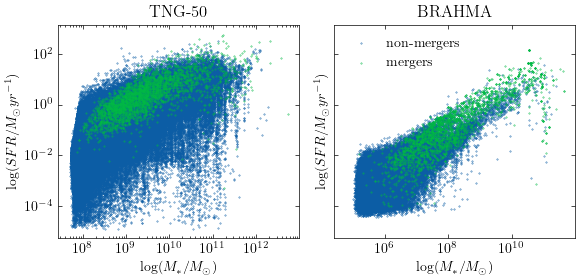

In [23]:
fig,axes = plt.subplots(1,2,figsize=[6,3],sharey=True)

#TNG-50
axes[0].scatter(TNG_50_non_merging_pop_Mstar[TNG_50_non_merging_pop_Mstar>0],TNG_50_non_merging_pop_SFR[TNG_50_non_merging_pop_Mstar>0],s=0.1,label="non-mergers")
axes[0].scatter(TNG_50_merging_pop_Mstar[TNG_50_merging_pop_Mstar>0],TNG_50_merging_pop_SFR[TNG_50_merging_pop_Mstar>0],s=0.1,label="mergers")
axes[0].set_yscale('log',base=10)
axes[0].set_xscale('log',base=10)
axes[0].set_xlabel("$\log(M_{*}/M_{\odot})$")
axes[0].set_ylabel("$\log(SFR/M_{\odot} yr^{-1})$")
axes[0].set_title("TNG-50")



#BRAHMA
axes[1].scatter(non_merging_pop['Mstar'][non_merging_pop['Mstar']>0],non_merging_pop['SFR'][non_merging_pop['Mstar']>0],s=0.1,label="non-mergers")
axes[1].scatter(merging_pop['Mstar'][merging_pop['Mstar']>0],merging_pop['SFR'][merging_pop['Mstar']>0],s=0.1,label="mergers")
axes[1].set_yscale('log',base=10)
axes[1].set_xscale('log',base=10)
axes[1].set_xlabel("$\log(M_{*}/M_{\odot})$")
axes[1].set_ylabel("$\log(SFR/M_{\odot} yr^{-1})$")
axes[1].set_title("BRAHMA")
axes[1].legend()
fig.tight_layout()

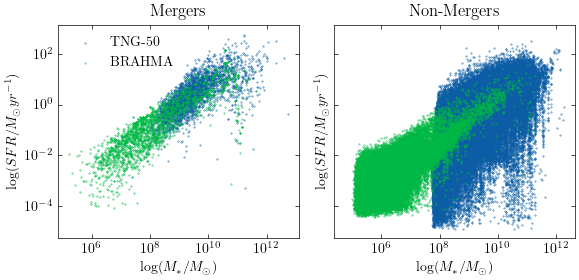

In [24]:
fig,axes = plt.subplots(1,2,figsize=[6,3],sharey=True)
axes[0].scatter(TNG_50_merging_pop_Mstar[TNG_50_merging_pop_Mstar>0],TNG_50_merging_pop_SFR[TNG_50_merging_pop_Mstar>0],s=0.1,label="TNG-50")
axes[0].scatter(merging_pop['Mstar'][merging_pop['Mstar']>0],merging_pop['SFR'][merging_pop['Mstar']>0],s=0.1,label="BRAHMA")
axes[0].set_yscale('log',base=10)
axes[0].set_xscale('log',base=10)
axes[0].set_xlabel("$\log(M_{*}/M_{\odot})$")
axes[0].set_ylabel("$\log(SFR/M_{\odot} yr^{-1})$")
axes[0].set_title("Mergers")
axes[0].legend()

axes[1].scatter(TNG_50_non_merging_pop_Mstar[TNG_50_non_merging_pop_Mstar>0],TNG_50_non_merging_pop_SFR[TNG_50_non_merging_pop_Mstar>0],s=0.1,label="TNG-50")
axes[1].scatter(non_merging_pop['Mstar'][non_merging_pop['Mstar']>0],non_merging_pop['SFR'][non_merging_pop['Mstar']>0],s=0.1,label="BRAHMA")
axes[1].set_yscale('log',base=10)
axes[1].set_xscale('log',base=10)
axes[1].set_xlabel("$\log(M_{*}/M_{\odot})$")
axes[1].set_ylabel("$\log(SFR/M_{\odot} yr^{-1})$")
axes[1].set_title("Non-Mergers")
# axes[1].legend()
fig.tight_layout()

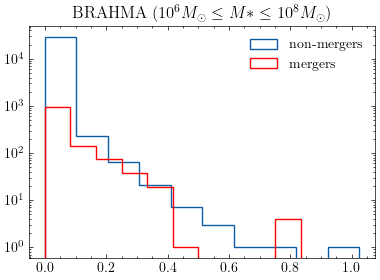

In [25]:
fig,axes = plt.subplots(1,1,figsize=[4,3],sharey=True)
axes.hist(non_merging_pop['SFR'][(non_merging_pop['Mstar']>1e6)&(non_merging_pop['Mstar']<1e8)],histtype='step',label="non-mergers")
axes.hist(merging_pop['SFR'][(merging_pop['Mstar']>1e6)&(merging_pop['Mstar']<1e8)],histtype='step',label="mergers",color="red")
axes.set_yscale('log',base=10)
axes.legend()
axes.set_title(r"BRAHMA ($10^6 M_{\odot} \leq M* \leq 10^8 M_{\odot}$)")
fig.tight_layout()

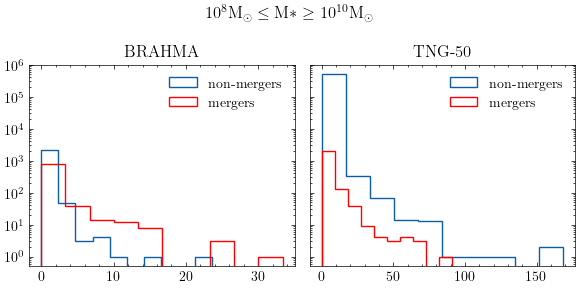

In [27]:
fig,axes = plt.subplots(1,2,figsize=[6,3],sharey=True)

axes[0].hist(non_merging_pop['SFR'][(non_merging_pop['Mstar']>Mstar_bins[0])&(non_merging_pop['Mstar']<Mstar_bins[2])],histtype='step',label="non-mergers")
axes[0].hist(merging_pop['SFR'][(merging_pop['Mstar']>Mstar_bins[0])&(merging_pop['Mstar']<Mstar_bins[2])],histtype='step',label="mergers",color="red")
axes[0].set_yscale('log',base=10)
axes[0].legend()
axes[0].set_title("BRAHMA")


axes[1].hist(TNG_50_non_merging_pop_SFR[(TNG_50_non_merging_pop_Mstar>Mstar_bins[0])&(TNG_50_non_merging_pop_Mstar<Mstar_bins[2])],histtype='step',label="non-mergers")
axes[1].hist(TNG_50_merging_pop_SFR[(TNG_50_merging_pop_Mstar>Mstar_bins[0])&(TNG_50_merging_pop_Mstar<Mstar_bins[2])],histtype='step',label="mergers",color="red")
axes[1].set_yscale('log',base=10)
axes[1].legend()
axes[1].set_title("TNG-50")


fig.suptitle(r"$\rm 10^8 M_{\odot} \leq M* \geq 10^{10} M_{\odot}$")
fig.tight_layout()

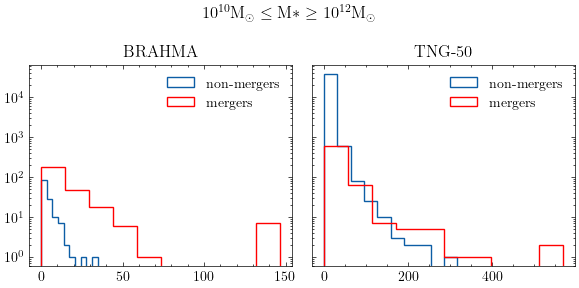

In [28]:
fig,axes = plt.subplots(1,2,figsize=[6,3],sharey=True)

axes[0].hist(non_merging_pop['SFR'][(non_merging_pop['Mstar']>Mstar_bins[2])&(non_merging_pop['Mstar']<Mstar_bins[4])],histtype='step',label="non-mergers")
axes[0].hist(merging_pop['SFR'][(merging_pop['Mstar']>Mstar_bins[2])&(merging_pop['Mstar']<Mstar_bins[4])],histtype='step',label="mergers",color="red")
axes[0].set_yscale('log',base=10)
axes[0].legend()
axes[0].set_title("BRAHMA")


axes[1].hist(TNG_50_non_merging_pop_SFR[(TNG_50_non_merging_pop_Mstar>Mstar_bins[2])&(TNG_50_non_merging_pop_Mstar<Mstar_bins[4])],histtype='step',label="non-mergers")
axes[1].hist(TNG_50_merging_pop_SFR[(TNG_50_merging_pop_Mstar>Mstar_bins[2])&(TNG_50_merging_pop_Mstar<Mstar_bins[4])],histtype='step',label="mergers",color="red")
axes[1].set_yscale('log',base=10)
axes[1].legend()
axes[1].set_title("TNG-50")


fig.suptitle(r"$\rm 10^{10} M_{\odot} \leq M* \geq 10^{12} M_{\odot}$")
fig.tight_layout()

In [ ]:
def sSFR_enhancement_across_mass_bins(Mstar_lower_limit,Mstar_upper_limit):
    sSFR_brahma_mergers = merging_pop['SFR'][(merging_pop['Mstar']>Mstar_lower_limit)&(merging_pop['Mstar']<Mstar_upper_limit)]
    sSFR_brahma_controls = 


In [29]:
sSFR_brahma_mergers = merging_pop['SFR'][(merging_pop['Mstar']>Mstar_bins[2])&(merging_pop['Mstar']<Mstar_bins[4])]